In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import datetime
import time

In [2]:
#reading raw data from csv
rawdata=pd.read_csv('C:/Users/Rory/Downloads/carInsurance_train.csv',index_col = 'Id')

Preprocessing

In [3]:
#not interested in this column
pdata1=rawdata.drop(["Communication"], axis=1)

In [4]:
#Filling in missing values
pdata1.isnull().sum()

Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [5]:
pdata1['Job'] = pdata1['Job'].fillna(method ='pad')
pdata1['Education'] = pdata1['Education'].fillna(method ='pad')
pdata1['Outcome'] = pdata1['Outcome'].fillna('none')
pdata1.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

In [6]:
#Creating a column which holds the duration of the call
pdata1['CallEnddt']=pd.to_datetime(pdata1['CallEnd'],format= '%H:%M:%S' )
pdata1['CallStartdt']=pd.to_datetime(pdata1['CallStart'],format= '%H:%M:%S' )
pdata1['CallDur']=pdata1['CallEnddt']-pdata1['CallStartdt']
pdata1['CallDur']= pd.to_numeric(pdata1.CallDur)
pdata1['CallDur']=pdata1['CallDur']/1000000000
pdata1.drop(columns=['CallStartdt','CallEnddt'])
pdata2=pdata1
#pdata['Balance']=pdata['Balance']/pdata['Balance'].max()
#pdata2['Outcome']=pdata2['Outcome'].replace(['success', 'failure'], ['1','0'])
#pdata.reset_index()

In [7]:
#Detecting outliers using Z-score, values with a Z-score over 10 are outliers
outliers=[]
def detect_outlier(data_1):
    
    threshold=10
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [8]:
outliers=[]
detect_outlier(pdata2['CallDur'])


[]

In [9]:
outliers=[]
detect_outlier(pdata2['Balance'])

[52587, 37127, 36686, 98417, 38279, 45248, 43074]

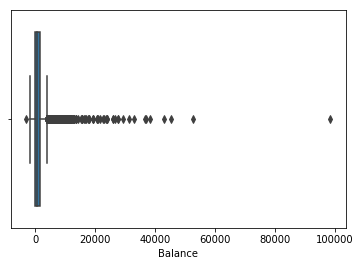

In [10]:
sns.boxplot(x="Balance", data=pdata2)

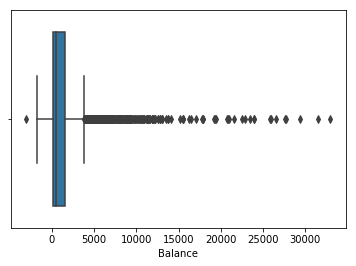

In [11]:
for i in outliers:
    indexName = pdata2[ pdata2['Balance'] == i ].index
    pdata2.drop(indexName , inplace=True)
    
sns.boxplot(x="Balance", data=pdata2)   
   

In [12]:
#separating call outcome into separate dataframe to use as Y
ydata=pdata2['CarInsurance']

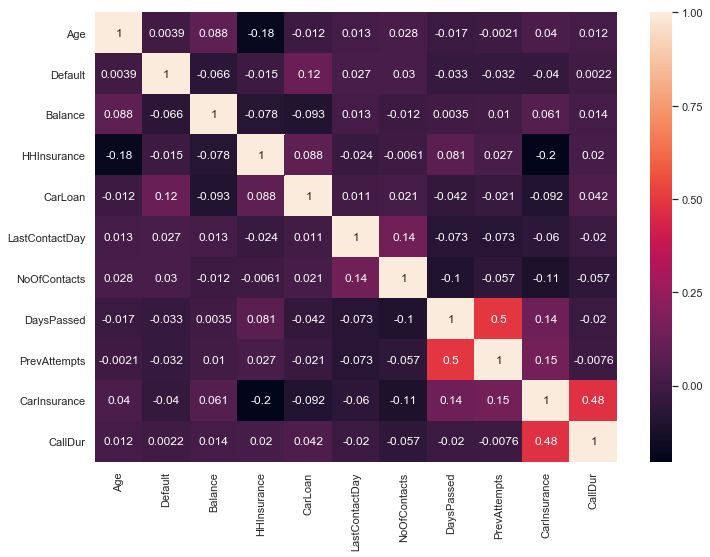

In [13]:
heatmapcorr=pdata2.corr()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(heatmapcorr, annot=True)

Call duration has the largest correlation with buying car insurance
Previous attemps and days passed correlate with buying car insurance
People with home insurance negatively correlates with buying car insurance

C:\Users\Rory\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rory\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Call Duration Histogram')

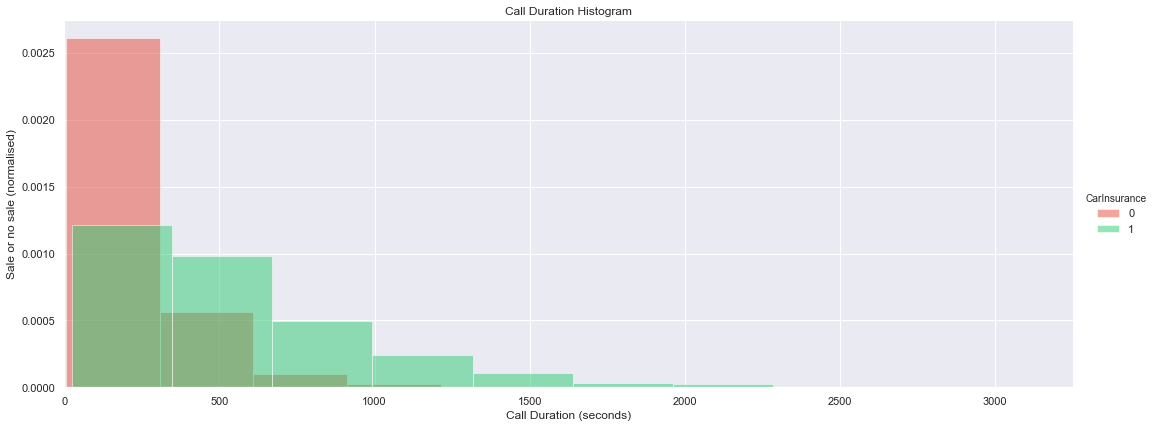

In [14]:
#Call duration and car insurance purchase hist
histpal=["#e74c3c", "#2ecc71"]
facet= sns.FacetGrid(pdata2, hue='CarInsurance', size=6, aspect =2.5, palette= histpal)
facet.map(plt.hist, 'CallDur', bins=10, alpha=0.5,  normed=True)
facet.set(xlim=(0,pdata2.CallDur.max()))
facet.add_legend()
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Sale or no sale (normalised)')
plt.title('Call Duration Histogram')

C:\Users\Rory\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


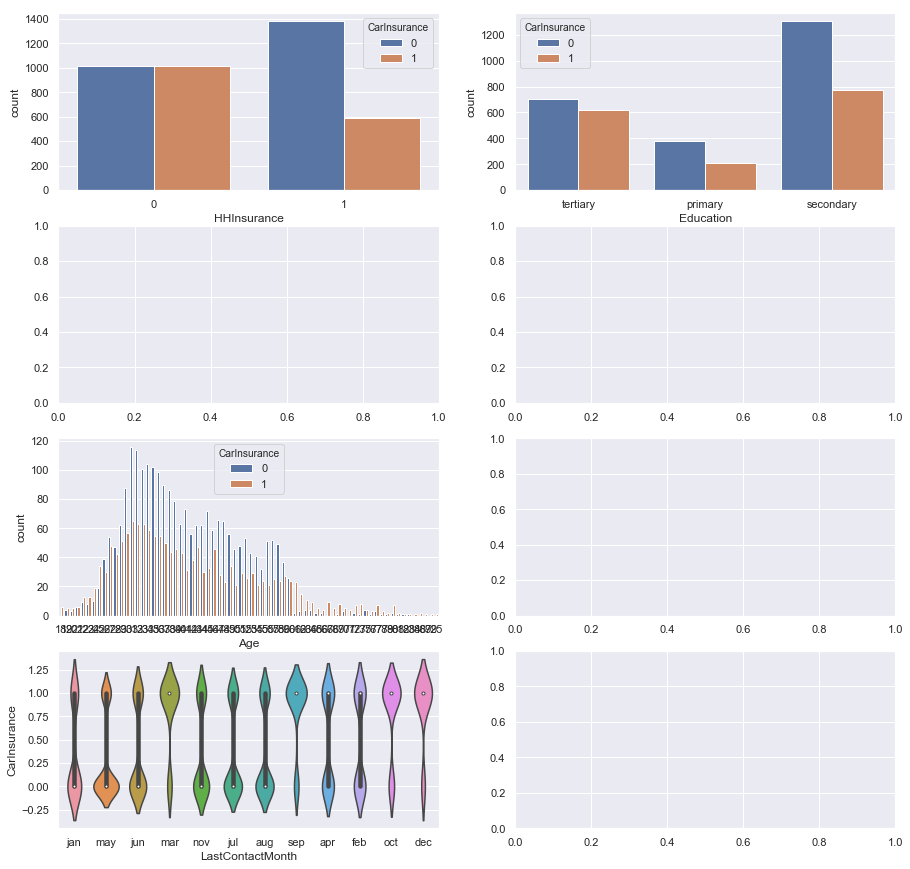

In [15]:
f, axes= plt.subplots(4,2, figsize=(15,15))
sns.countplot(x='Education', hue='CarInsurance', data=pdata2, ax=axes[0,1])
sns.countplot(x='HHInsurance', hue='CarInsurance', data=pdata2, ax=axes[0,0])
sns.violinplot(x="LastContactMonth",y='CarInsurance',data=pdata2, ax=axes[3,0])
sns.countplot(x='Age', hue='CarInsurance', data=pdata2, ax=axes[2,0])

In [18]:
df=pdata2
df['CDquar']=pd.qcut(df['CallDur'], q=4)
df['CDdec']=pd.qcut(df['CallDur'], q=10, precision=0)

Create data for the ratio of sales to no sales for each bin

Count unique values for each bin- make df


In [28]:
df['CDquarl']=pd.qcut(df['CallDur'], q=[0, 0.25, 0.5, 0.75, 1], precision=0, labels=False)
df['CDdecl']=pd.qcut(df['CallDur'], q=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], precision=0, labels=False)